In [2]:
from astroquery.gaia import Gaia
import numpy as np

# Boyajian's star's source id:
source_id = 2081900940499099136

# Get Boyajian's star Gaia data:
catalog = 'gaiadr2.gaia_source'
job = Gaia.launch_job("SELECT * FROM "+catalog+" WHERE source_id = "+str(source_id))
j = job.get_results()

In [4]:
# Get the first 2000 sources within 30 arcmin of Boyajian's star.  For every object, perform the same
# query on the Gaia archive site
search_string = "SELECT DISTANCE( \
  POINT('ICRS', ra, dec), \
  POINT('ICRS', "+str(j['ra'][0])+", "+str(j['dec'][0])+")) AS dist, * \
FROM gaiadr2.gaia_source \
WHERE 1=CONTAINS( \
  POINT('ICRS', ra, dec), \
  CIRCLE('ICRS', "+str(j['ra'][0])+", "+str(j['dec'][0])+", 0.5)) \
ORDER BY dist ASC"

job = Gaia.launch_job(search_string)
k = job.get_results()

In [8]:
## Insert data from astrometic analysis:
# abs proper motion cc1:
deltara, deltaraerr = np.array([-3762.5887982713593, -3753.9253465592133, -3740.212372820501]), \
    np.array([2.028255315213999, 1.4586276742335205, 1.3707963940438135])
deltadec, deltadecerr = np.array([-911.890969833246, -908.3759554447081, -907.1304212567323]), \
    np.array([1.9708622663491537, 1.403047724486605, 1.2997835651601395])
date = np.array([2014.7890411,  2016.71857923, 2019.44383562])


cc1_pmra_rel, cc1_pmra_rel_err = np.mean((np.random.normal(deltara[-1],deltaraerr[-1],1000)
                        - np.random.normal(deltara[0],deltaraerr[0],1000)) / 
                        (date[-1] - date[0])), \
                        np.std((np.random.normal(deltara[-1],deltaraerr[-1],1000)
                        - np.random.normal(deltara[0],deltaraerr[0],1000)) / 
                        (date[-1] - date[0]))
cc1_pmdec_rel, cc1_pmdec_rel_err = np.mean((np.random.normal(deltadec[-1],deltadecerr[-1],1000)
                        - np.random.normal(deltadec[0],deltadecerr[0],1000)) / 
                        (date[-1] - date[0])), \
                        np.std((np.random.normal(deltadec[-1],deltadecerr[-1],1000)
                        - np.random.normal(deltadec[0],deltadecerr[0],1000)) / 
                        (date[-1] - date[0]))

cc1_pmra, cc1_pmdec = k['pmra'][0]+cc1_pmra_rel, k['pmdec'][0]+cc1_pmdec_rel
cc1_pmra_err = np.sqrt(k['pmra_error'][0]**2 + cc1_pmra_rel_err**2)
cc1_pmdec_err = np.sqrt(k['pmdec_error'][0]**2 + cc1_pmdec_rel_err**2)
print('cc1 abs pm ra',cc1_pmra, '+/-',cc1_pmra_err)
print('cc1 abs pm dec',cc1_pmdec, '+/-', cc1_pmdec_err)
print('cc1 Abs pm:',np.sqrt(cc1_pmra**2+cc1_pmdec**2), '+/-', np.sqrt(cc1_pmra_err**2+cc1_pmdec_err**2))
print()


deltara, deltaraerr = np.array([-2211.768806584391, -2191.8073444303873]), \
    np.array([4.312743590811837, 1.8272870768956226])
deltadec, deltadecerr = np.array([-1698.1673203573998, -1680.9693531471257]), \
    np.array([4.275842510190913, 1.9543631712899492])


# Monte carlo for mean and error:
cc2_pmra_rel, cc2_pmra_rel_err = np.mean((np.random.normal(deltara[-1],deltaraerr[-1],1000)
                        - np.random.normal(deltara[0],deltaraerr[0],1000)) / 
                        (date[-1] - date[-2])), \
                        np.std((np.random.normal(deltara[-1],deltaraerr[-1],1000)
                        - np.random.normal(deltara[0],deltaraerr[0],1000)) / 
                        (date[-1] - date[-2]))
cc2_pmdec_rel, cc2_pmdec_rel_err = np.mean((np.random.normal(deltadec[-1],deltadecerr[-1],1000)
                        - np.random.normal(deltadec[0],deltadecerr[0],1000)) / 
                        (date[-1] - date[-2])), \
                        np.std((np.random.normal(deltadec[-1],deltadecerr[-1],1000)
                        - np.random.normal(deltadec[0],deltadecerr[0],1000)) / 
                        (date[-1] - date[-2]))

cc2_pmra, cc2_pmdec = k['pmra'][0]+cc2_pmra_rel, k['pmdec'][0]+cc2_pmdec_rel
# add errors in quad:
cc2_pmra_err = np.sqrt(k['pmra_error'][0]**2 + cc2_pmra_rel_err**2)
cc2_pmdec_err = np.sqrt(k['pmdec_error'][0]**2 + cc2_pmdec_rel_err**2)
print('cc2 abs pm ra', cc2_pmra,'+/-', cc2_pmra_err)
print('cc2 abs pm dec', cc2_pmdec,'+/-', cc2_pmdec_err)
print('cc2 Abs pm:',np.sqrt(cc2_pmra**2+cc2_pmdec**2), '+/-', np.sqrt(cc2_pmra_err**2+cc2_pmdec_err**2))

cc1 abs pm ra -5.57025873457812 +/- 0.5262548608855292
cc1 abs pm dec -9.267501569366663 +/- 0.5049871608260521
cc1 Abs pm: 10.812694747765581 +/- 0.7293532828505022

cc2 abs pm ra -3.1190390132314505 +/- 1.6850873783531792
cc2 abs pm dec -3.9562995614437835 +/- 1.6625510472852578
cc2 Abs pm: 5.037927211258624 +/- 2.367191470395772


In [11]:
rms_ra = np.sqrt(np.mean(k['pmra']**2))
rms_dec = np.sqrt(np.mean(k['pmdec']**2))
rms_ra = np.average(k['pmra'], weights = k['pmra_error'])
rms_dec = np.average(k['pmdec'], weights = k['pmdec_error'])
print('Mean pm ra',rms_ra,'Mean pm dec',rms_dec)
print('Mean total pm',np.sqrt(rms_ra**2+rms_dec**2))

Mean pm ra -2.6757019158511706 Mean pm dec -3.8933079719958186
Mean total pm 4.724111314024662


<IPython.core.display.Javascript object>


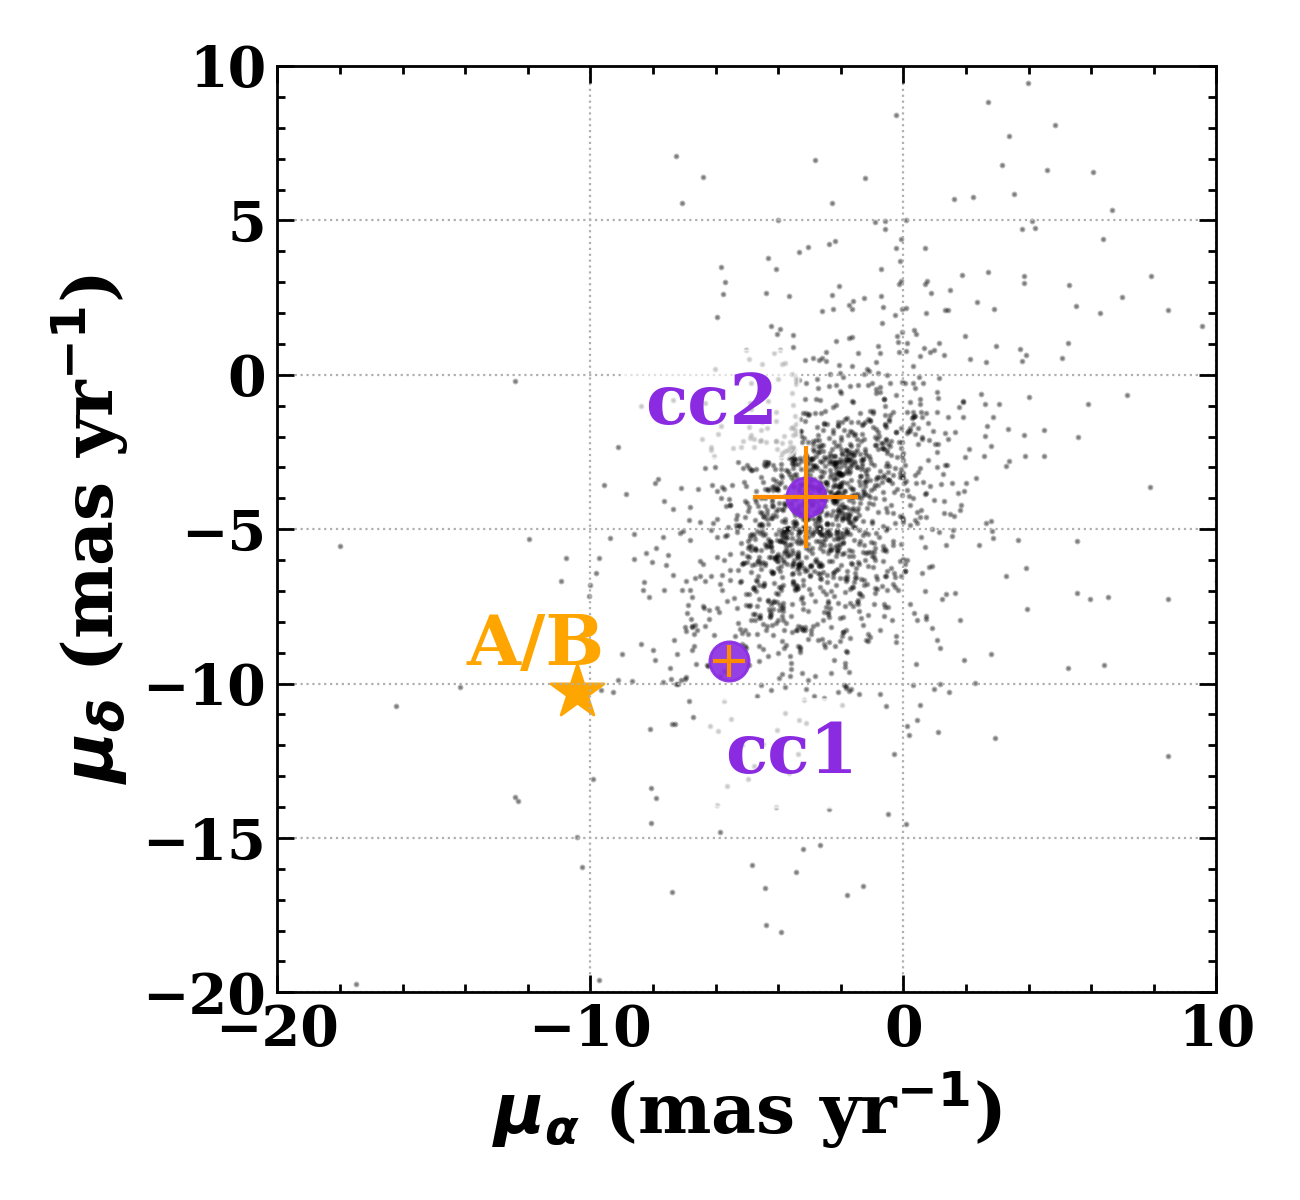

In [13]:
plt.style.use('magrathea_bold')
%matplotlib notebook
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.figure(figsize = (6.5,6))
plt.scatter(k['pmra'],k['pmdec'], marker='.', c = 'black', alpha = 0.3, s = 5)
plt.scatter(k['pmra'][0],k['pmdec'][0], marker = '*', color = 'orange', s = 400)
plt.scatter(cc1_pmra, cc1_pmdec, marker = 'o', color = 'blueviolet', s = 200, alpha = 0.9)
plt.errorbar(cc1_pmra, cc1_pmdec, xerr = cc1_pmra_err, yerr = cc1_pmdec_err, ls = 'none', color = 'darkorange')
plt.scatter(cc2_pmra, cc2_pmdec, marker = 'o', color = 'blueviolet', s = 200, alpha = 0.9)
plt.errorbar(cc2_pmra, cc2_pmdec, xerr = cc2_pmra_err, yerr = cc2_pmdec_err, ls = 'none', color = 'darkorange')
#plt.scatter(rms_ra,rms_dec, marker = '+', color='red')

ax = plt.gca()
bbox_props = dict(boxstyle="round", fc="w", ec="w", alpha=0.6)
ax.text(cc1_pmra+2, cc1_pmdec-3, 'cc1', ha="center", va="center", size=25, color = 'blueviolet', 
        bbox=bbox_props)
ax.text(cc2_pmra-3, cc2_pmdec+3, 'cc2', ha="center", va="center", size=25, color = 'blueviolet', 
        bbox=bbox_props)
plt.annotate('A/B', xy=(k['pmra'][0],k['pmdec'][0]), xytext=(-40, 10),
             textcoords='offset points', color = 'orange', fontsize = 25, weight='bold')
plt.xlim(-20,10)
plt.ylim(-20,10)
plt.grid(ls=':')
plt.xlabel(r'$\mu_{\alpha}$ (mas yr$^{-1}$)', fontsize = 25)
plt.ylabel(r'$\mu_{\delta}$ (mas yr$^{-1}$)', fontsize = 25)
plt.tight_layout()
#plt.savefig('KIC8462852_pm_comparison_bw.png')
plt.show()